In [1]:
import wandb
import pandas as pd

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: mrjty (mrjty-personal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [3]:
# import ydata_profiling as pandas_profiling
# FIX YOUR DEPENDENCIES!
# profile = pandas_profiling.ProfileReport(df)
# profile.to_widgets()

ModuleNotFoundError: No module named 'ydata_profiling'

=== Dataset Overview ===
Shape: (20000, 16)
Memory usage: 8.71 MB

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_

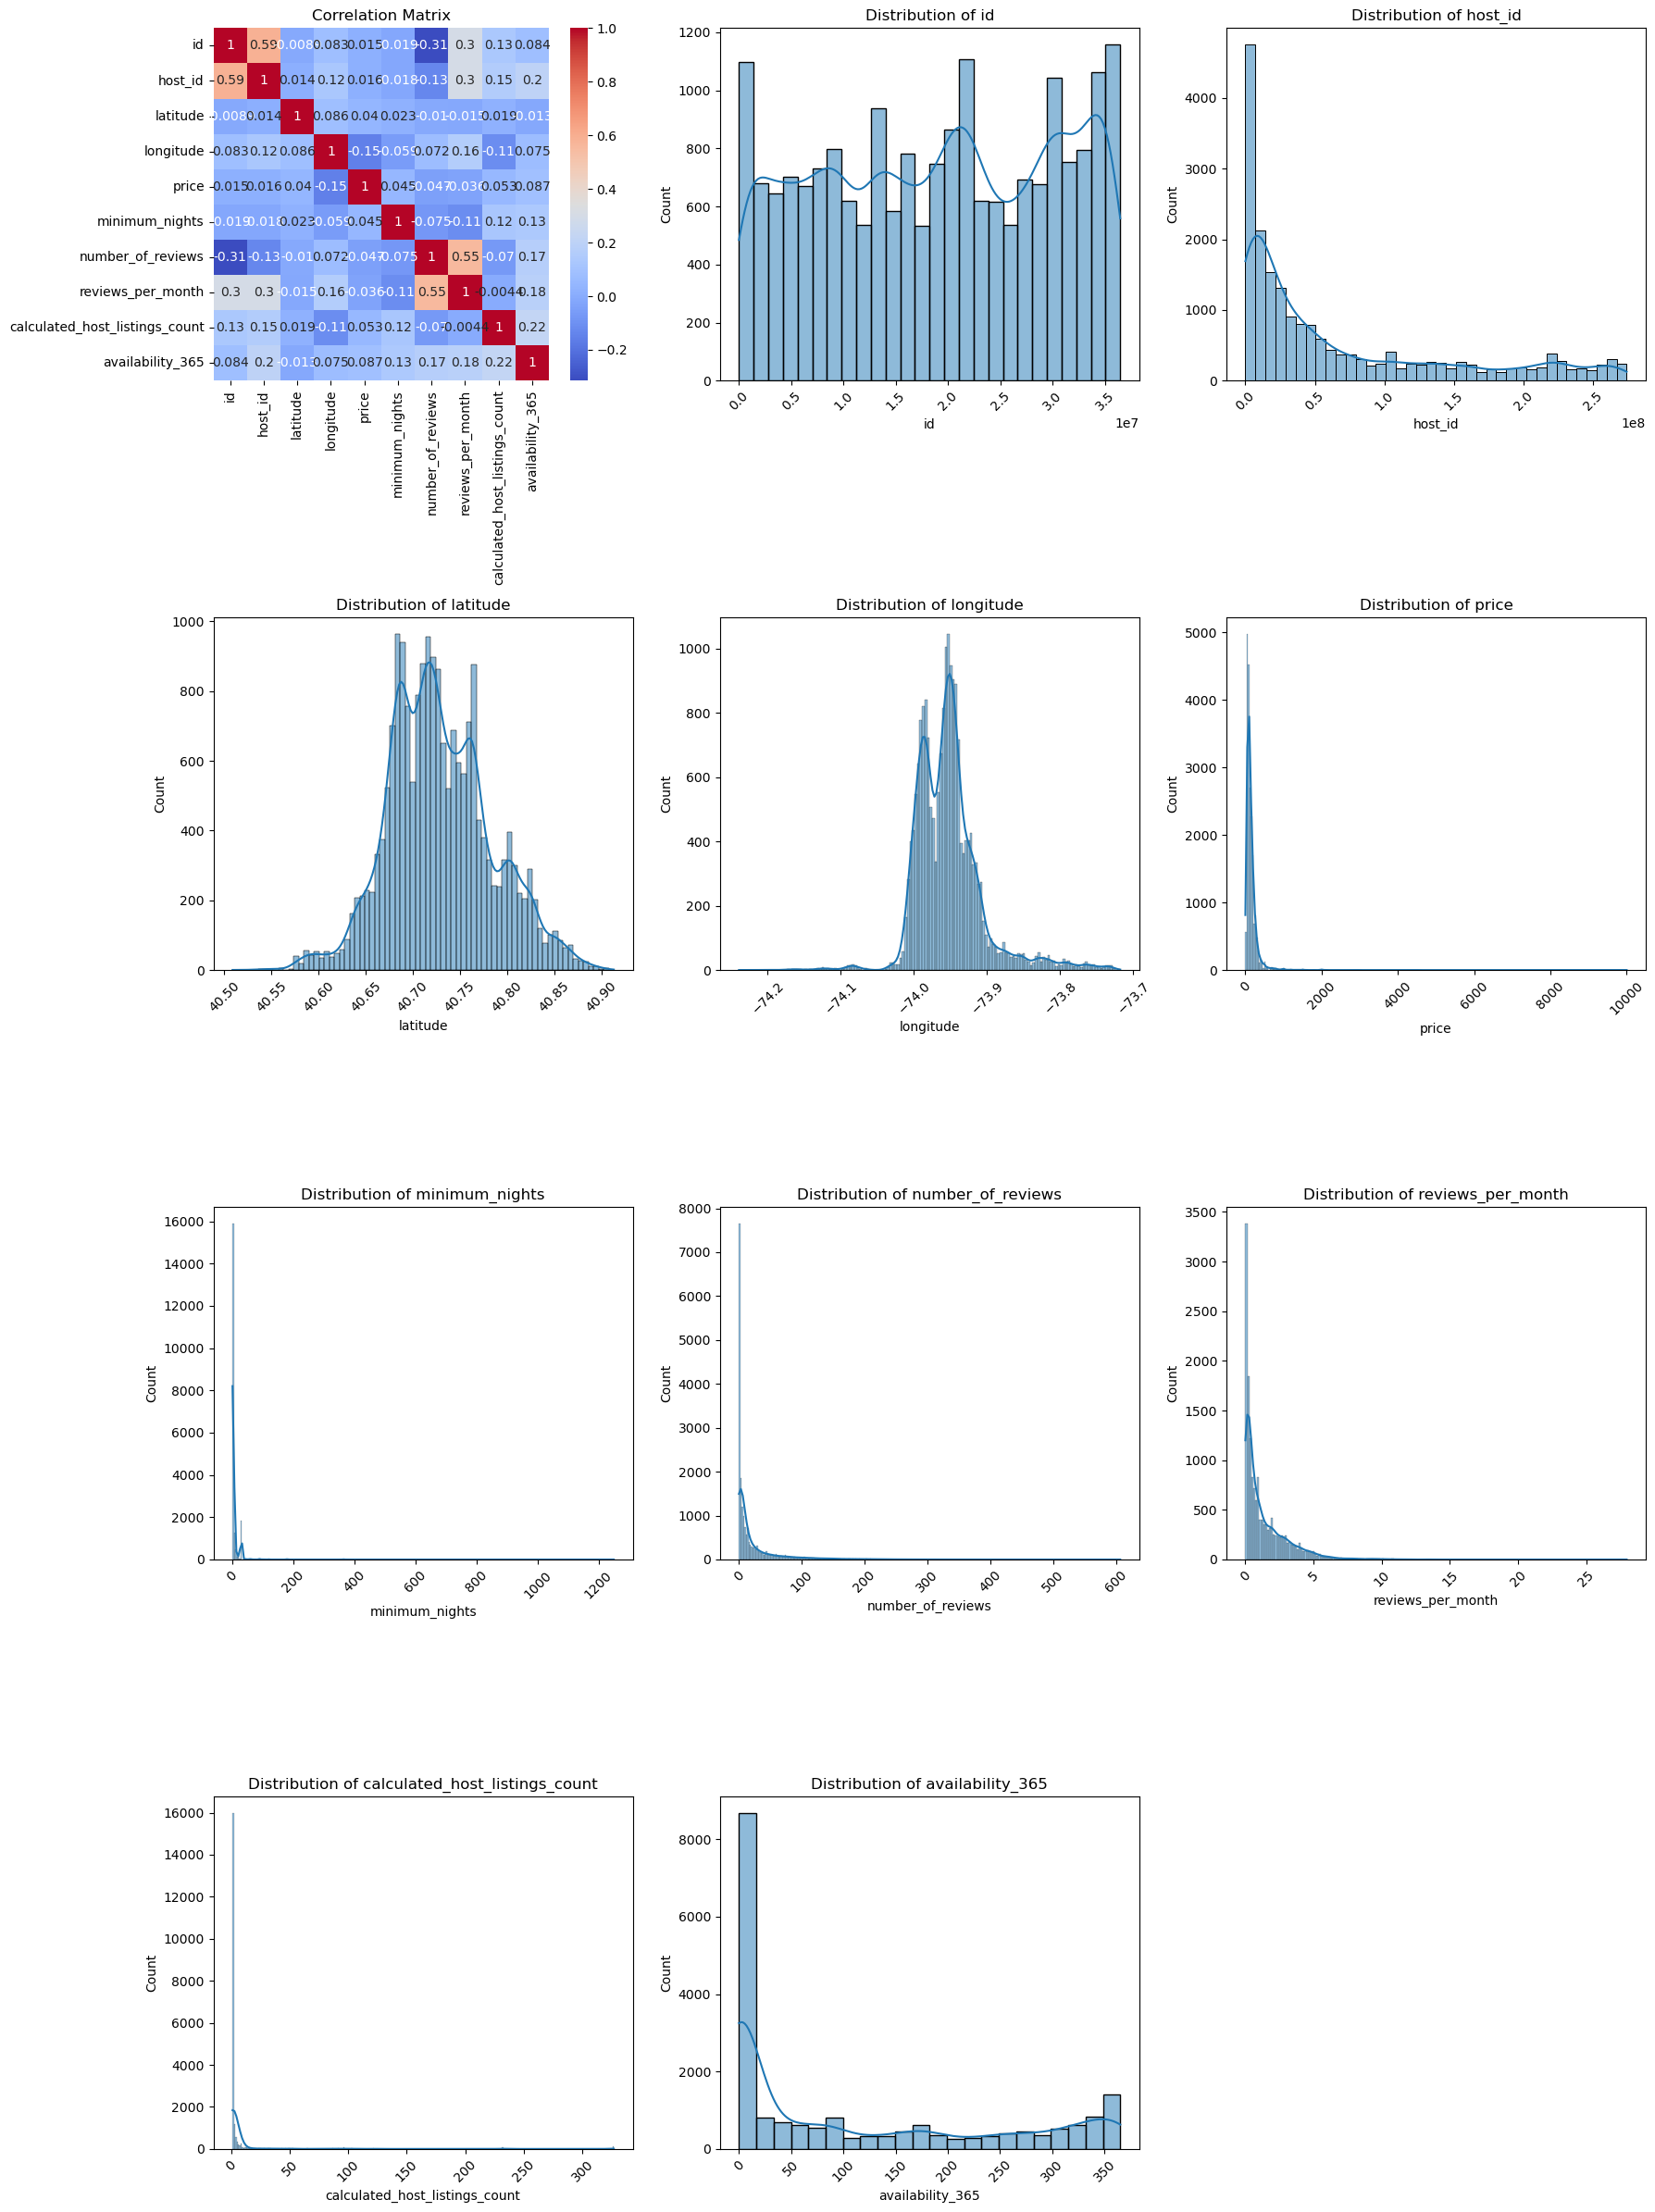

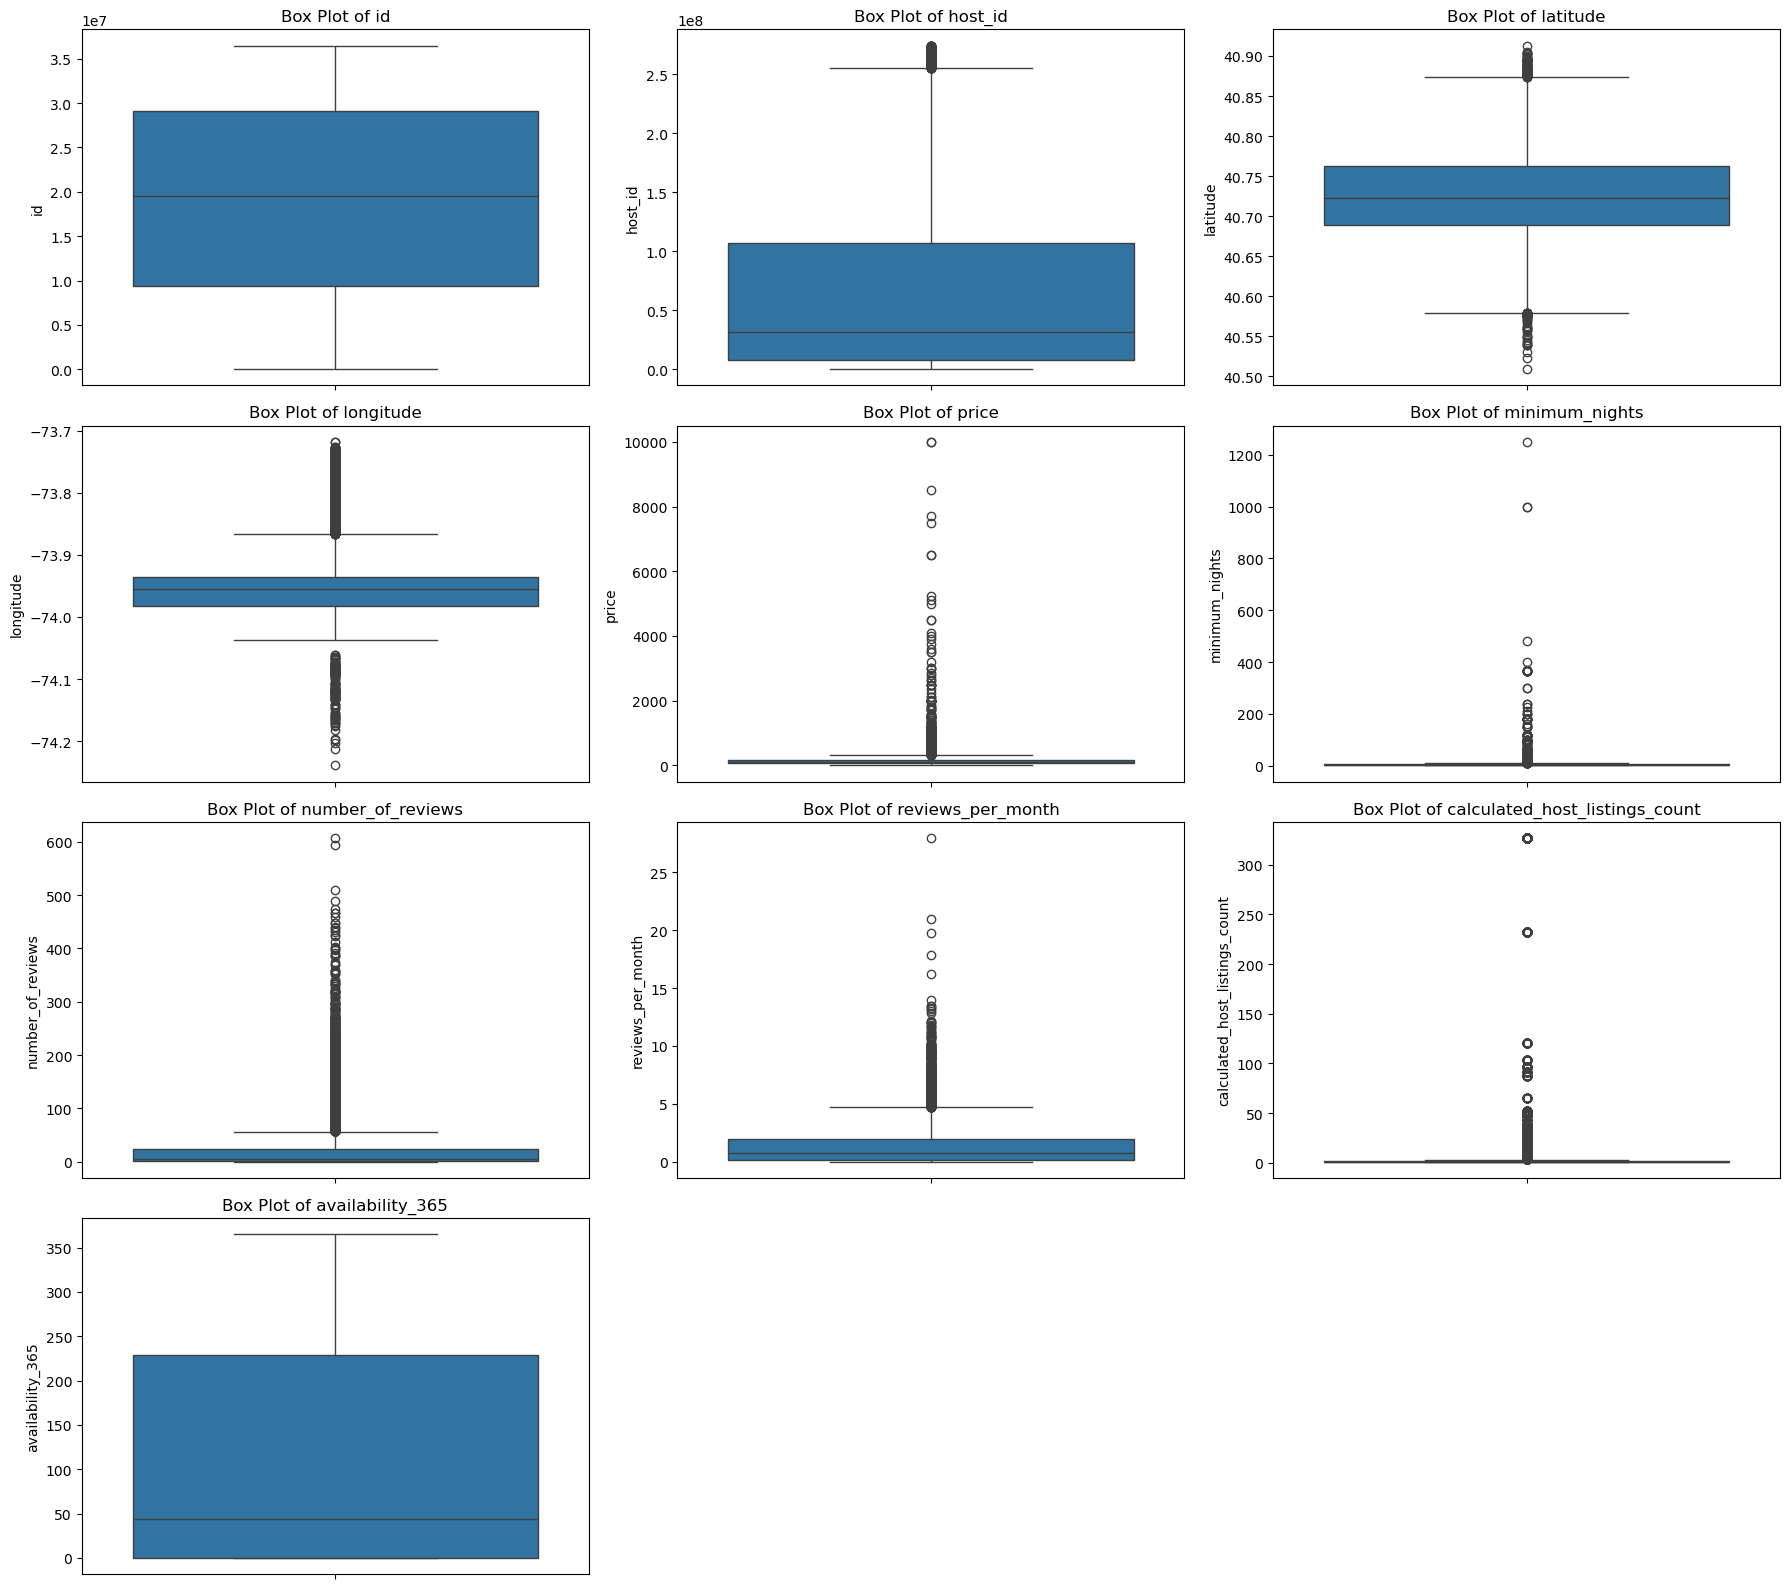

In [7]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math

def create_profile_report(df):
  print("=== Dataset Overview ===")
  print(f"Shape: {df.shape}")
  print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

  print("\n=== Basic Info ===")
  print(df.info())

  print("\n=== Statistical Summary ===")
  print(df.describe(include='all'))

  print("\n=== Missing Values ===")
  missing = df.isnull().sum()
  print(missing[missing > 0])

  # Visualizations
  numeric_cols = df.select_dtypes(include=['number']).columns
  if len(numeric_cols) > 0:
      # Calculate grid size for all numeric columns
      n_cols = len(numeric_cols)
      n_rows = math.ceil((n_cols + 1) / 3)  # +1 for correlation matrix

      fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
      axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

      # Correlation heatmap (first plot)
      sns.heatmap(df[numeric_cols].corr(), annot=True, ax=axes[0], cmap='coolwarm')
      axes[0].set_title('Correlation Matrix')

      # Distribution plots for all numeric columns
      for i, col in enumerate(numeric_cols):
          ax_idx = i + 1  # Start from index 1 (after correlation plot)
          sns.histplot(df[col], kde=True, ax=axes[ax_idx])
          axes[ax_idx].set_title(f'Distribution of {col}')
          axes[ax_idx].tick_params(axis='x', rotation=45)

      # Hide unused subplots
      for j in range(len(numeric_cols) + 1, len(axes)):
          axes[j].set_visible(False)

      plt.tight_layout()
      plt.show()

      # Optional: Create box plots for outlier detection
      if len(numeric_cols) > 1:
          n_box_rows = math.ceil(len(numeric_cols) / 3)
          fig2, axes2 = plt.subplots(n_box_rows, 3, figsize=(18, 4 * n_box_rows))
          axes2 = axes2.flatten() if n_box_rows > 1 else [axes2] if n_box_rows == 1 else axes2

          for i, col in enumerate(numeric_cols):
              sns.boxplot(y=df[col], ax=axes2[i])
              axes2[i].set_title(f'Box Plot of {col}')

          # Hide unused subplots
          for j in range(len(numeric_cols), len(axes2)):
              axes2[j].set_visible(False)

          plt.tight_layout()
          plt.show()

# Usage
create_profile_report(df)


In [ ]:
# what do you notice? Look around and see what you can find. 
# For example, there are missing values in a few columns and the column `last_review` is a 
# date but it is in string format. Look also at the `price` column, and note the outliers. There are some zeros and 
# some very high prices. After talking to your stakeholders, you decide to consider from a minimum of $ 10 to a 
# maximum of $ 350 per night.

In [8]:
def plot_distribution(df, column_name):
  """
  Create a distribution plot for a single column.

  Parameters:
  df (pandas.DataFrame): The dataframe containing the data
  column_name (str): The name of the column to plot
  """
  plt.figure(figsize=(10, 6))

  # Check if column exists
  if column_name not in df.columns:
      print(f"Error: Column '{column_name}' not found in dataframe")
      return

  # Check if column is numeric
  if not pd.api.types.is_numeric_dtype(df[column_name]):
      print(f"Warning: Column '{column_name}' is not numeric. Creating a count plot instead.")
      sns.countplot(data=df, x=column_name)
      plt.xticks(rotation=45)
  else:
      # Create histogram with KDE for numeric columns
      sns.histplot(df[column_name], kde=True, stat='density', alpha=0.7)
      plt.axvline(df[column_name].mean(), color='red', linestyle='--', label=f'Mean: {df[column_name].mean():.2f}')
      plt.axvline(df[column_name].median(), color='orange', linestyle='--', label=f'Median: {df[column_name].median():.2f}')
      plt.legend()

  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Density' if pd.api.types.is_numeric_dtype(df[column_name]) else 'Count')
  plt.tight_layout()
  plt.show()

extreme price distribution, we should cap this


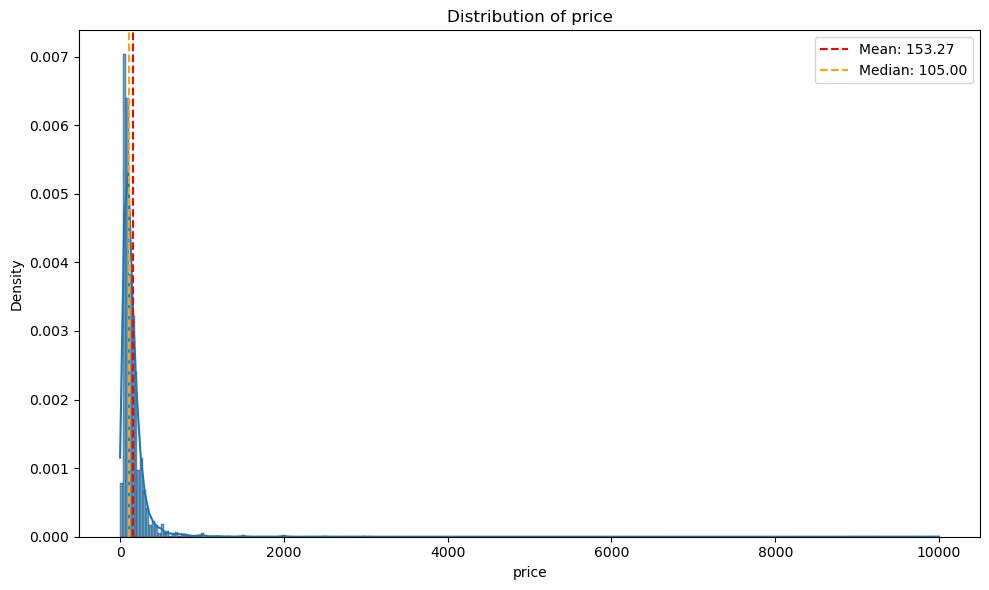

In [12]:
print("extreme price distribution, we should cap this")
plot_distribution(df, "price")

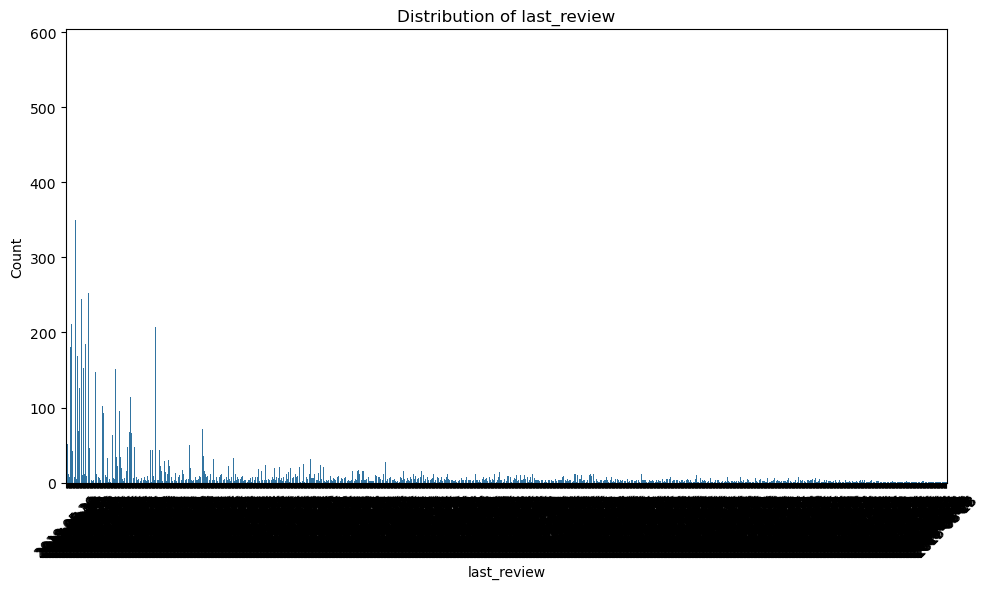

In [13]:
plot_distribution(df, "last_review")
# this should be treated as a datetime

In [14]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df_clean = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

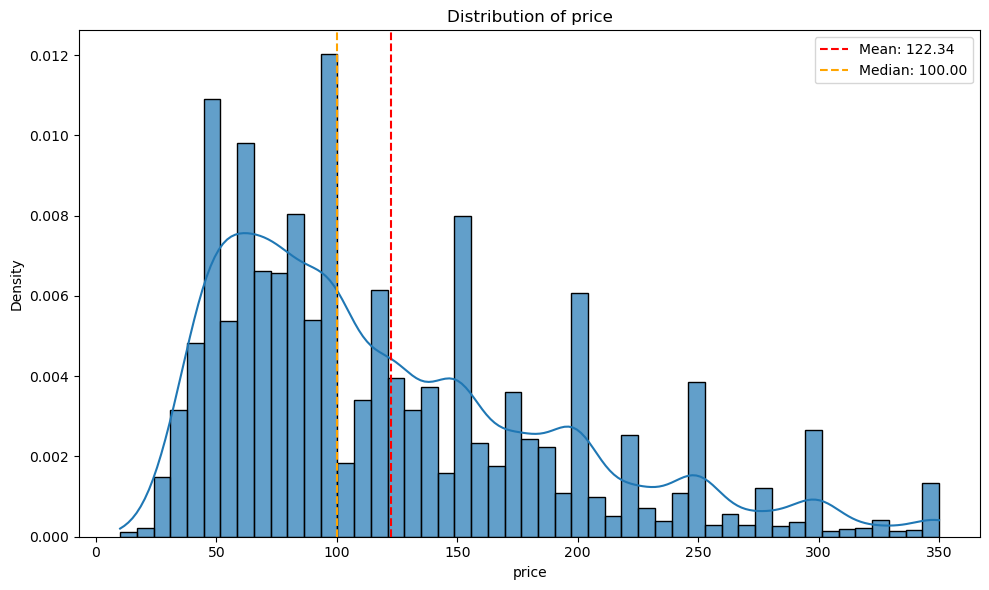

In [16]:
plot_distribution(df_clean, "price")


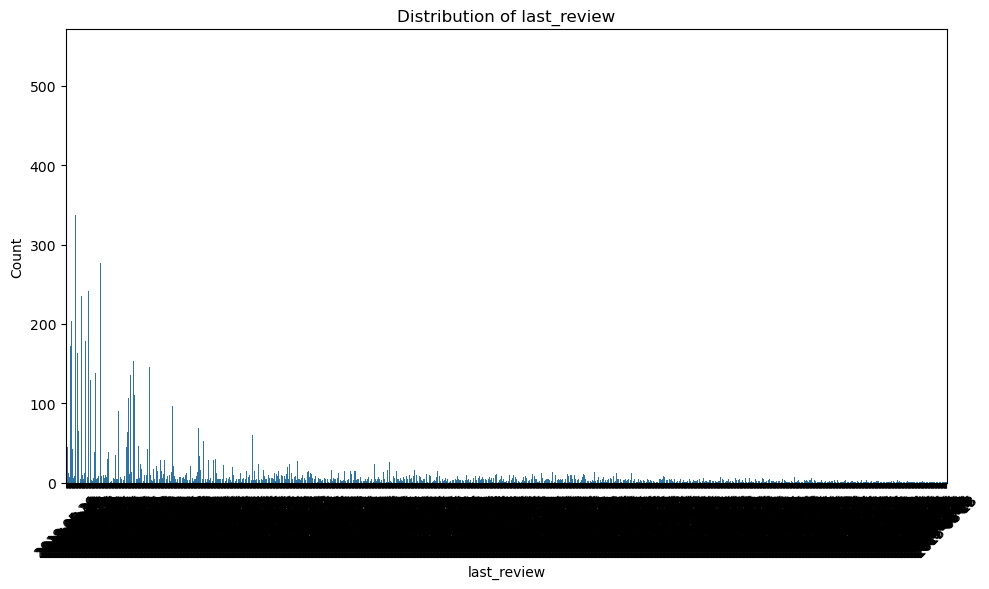

In [17]:
plot_distribution(df_clean, "last_review")

In [18]:
df_clean["last_review"].head()

0    2019-05-26
1           NaN
2    2018-09-19
3    2019-05-24
4    2019-06-23
Name: last_review, dtype: object

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19001 non-null  int64  
 1   name                            18994 non-null  object 
 2   host_id                         19001 non-null  int64  
 3   host_name                       18993 non-null  object 
 4   neighbourhood_group             19001 non-null  object 
 5   neighbourhood                   19001 non-null  object 
 6   latitude                        19001 non-null  float64
 7   longitude                       19001 non-null  float64
 8   room_type                       19001 non-null  object 
 9   price                           19001 non-null  int64  
 10  minimum_nights                  19001 non-null  int64  
 11  number_of_reviews               19001 non-null  int64  
 12  last_review                     15243